In [1]:
import numpy as np
# import statsmodels.api as sm
import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from cmcrameri import cm

In [58]:
nobs = 721549
# neval = 2000
np.random.seed(1234)  # Seed random generator
c1 = np.random.normal(0, 2, size=(nobs,1))
c2 = np.random.normal(2, 2, size=(nobs,1))
cc12 = np.hstack([c1,c2])
x = np.linspace(-6, 6, 100)
y = np.linspace(-4, 8, 100)
xv, yv = np.meshgrid(x, y)
halfd = (x[1] - x[0])/2
cc12s = np.vstack([xv.flatten(),yv.flatten()]).T
# c1s = c1[:neval]
# c2s = c2[:neval]
# cc12s = cc12[:neval, :]
# cc12

In [60]:
cc12

array([[ 0.94287033, -0.77719767],
       [-2.38195139, -2.5566537 ],
       [ 2.86541394,  1.33139352],
       ...,
       [ 0.35712549,  0.08839412],
       [ 0.11815581,  0.10129342],
       [-1.12197973,  1.33361526]])

In [59]:
%%time
# kde2 = KernelDensity(kernel="epanechnikov", bandwidth=c1.size **(-1./(2+4))).fit(cc12)
# kde2 = KernelDensity(kernel="epanechnikov", bandwidth=0.6).fit(cc12)
kde2 = KernelDensity(kernel="epanechnikov", bandwidth=2 * 0.6).fit(cc12)
log_density2 = kde2.score_samples(cc12s)
density2 = np.exp(log_density2)

CPU times: user 28 s, sys: 22 ms, total: 28 s
Wall time: 28 s


In [54]:
density_plot = np.reshape(density2, np.shape(xv))

In [55]:
thres_multiplier = np.e ** (2.0 ** 2 / 2)   # 2.0 sigma, normal dist., +- sigma number 
thres = max(density2) / thres_multiplier
thres_idx_4 = density2 >= thres
idx_4 = thres_idx_4    # alias

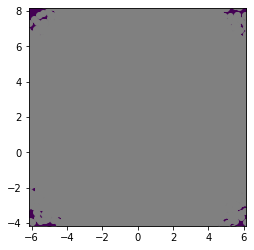

In [56]:
plt.scatter(c1, c2, c='gray')
plt.imshow(density_plot,
           extent=[xv.min()-halfd, xv.max()+halfd, yv.min()-halfd, yv.max()+halfd],
           interpolation='bicubic', origin='lower', alpha=1)

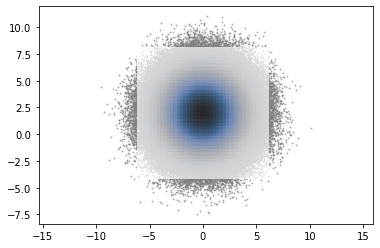

In [57]:
pt_style = {'s': 1, 'edgecolor': None}
# plt.pcolormesh(xv, yv, density_plot, alpha=1, shading='gouraud', cmap='magma_r')
plt.scatter(c1, c2, c='gray', alpha=0.5, **pt_style)
plt.pcolormesh(xv, yv, density_plot, alpha=0.7, shading='nearest', cmap=cm.oslo_r)
plt.axis('equal');

In [33]:
np.max(density_plot)

0.03818743984850699

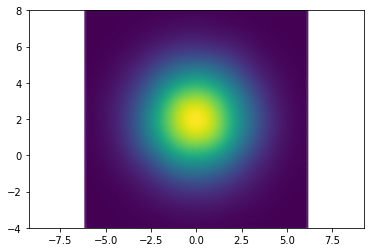

In [80]:
plt.scatter(xv.flatten(), yv.flatten(), c=density2, alpha=0.5)
plt.pcolormesh(xv, yv, density_plot, alpha=0.5, shading='gouraud', rasterized=True)
plt.axis('equal');

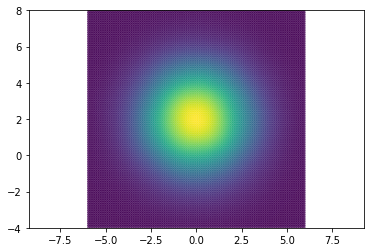

In [90]:
plt.pcolormesh(xv, yv, density_plot, alpha=0.5, shading='gouraud', rasterized=True)
# plt.scatter(c1, c2, c='gray', alpha=0.01)
# plt.scatter(xv.flatten()[~idx_4], yv.flatten()[~idx_4], color='xkcd:gray')
plt.axis('equal');

In [55]:
xt, yt = np.meshgrid([-1, 0, 1], [-1, 0, 1])
# zt = np.array([[1,2], [2,3]])
zt = np.array([[1,2,3], [2,3,4], [3,4,5]])

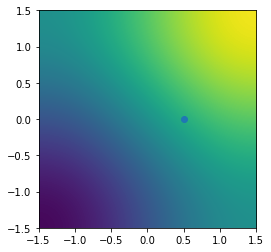

In [93]:
# plt.pcolormesh(xt,yt,zt)
# plt.pcolormesh(xt,yt,zt,shading='nearest') 
# plt.pcolormesh(xt,yt,zt,shading='gouraud')
# plt.imshow(zt,
#            extent=[xt.min()-0.5, xt.max()+0.5, yt.min()-0.5, yt.max()+0.5],
#            interpolation='nearest', origin='lower')
plt.imshow(zt,
           extent=[xt.min()-0.5, xt.max()+0.5, yt.min()-0.5, yt.max()+0.5],
           interpolation='bicubic', origin='lower')
plt.scatter([0.5], [0])

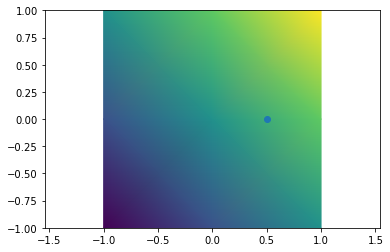

In [63]:
plt.pcolormesh(xt,yt,zt,shading='gouraud')
plt.axis('equal')
plt.scatter([0.5], [0])

In [37]:
cc12

array([[ 0.94287033, -0.84836883],
       [-2.38195139,  2.50774352],
       [ 2.86541394, -0.42308251],
       ...,
       [ 2.49235625, -0.10298504],
       [ 1.23794372,  4.03304518],
       [-1.01601954,  3.31448907]])

In [39]:
tmp = np.cov(cc12.T)

In [45]:
tmp[0, 0] / tmp[1, 1]

0.9866432141709514